In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [13]:
df = pd.read_csv('..\dataset\Churn_Modelling.csv.xls')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [17]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

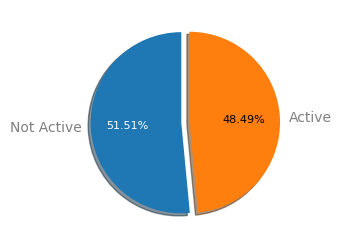

In [18]:
values = df.IsActiveMember.value_counts()
labels = ['Not Active', 'Active']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

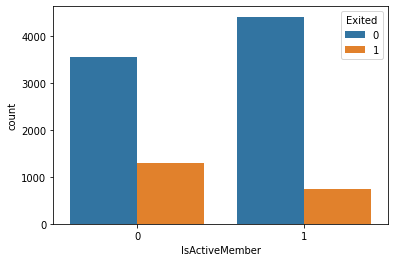

In [19]:
sns.countplot(x=df.IsActiveMember , hue =df.Exited )

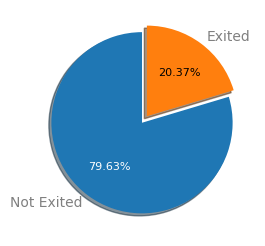

In [20]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

**there is imbalance data 80% to 20 %**

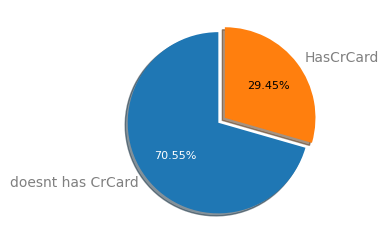

In [21]:
values = df.HasCrCard.value_counts()
labels = ['doesnt has CrCard', 'HasCrCard']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

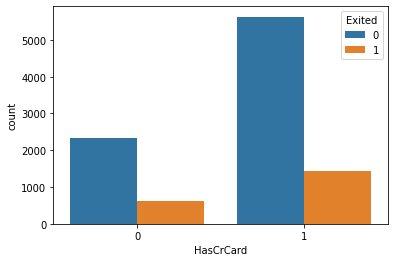

In [22]:
sns.countplot(x=df.HasCrCard , hue =df.Exited )

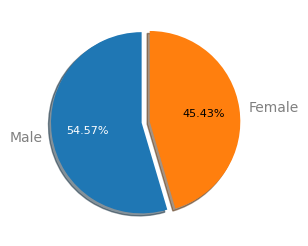

In [23]:
values = df.Gender.value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

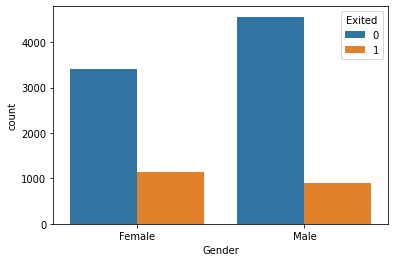

In [24]:
sns.countplot(x=df.Gender , hue =df.Exited )

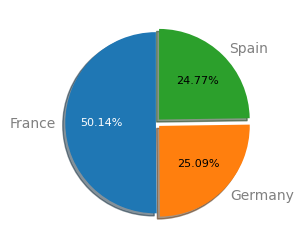

In [25]:
values = df.Geography.value_counts()
labels = ['France', 'Germany', 'Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.05,0.05)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
autotexts[2].set_color('black')
plt.show()

<AxesSubplot:xlabel='Geography', ylabel='count'>

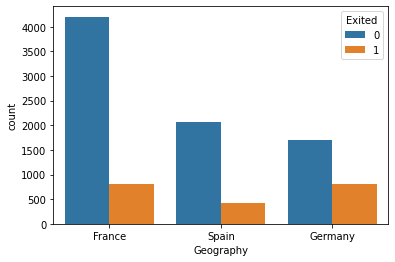

In [26]:
sns.countplot(x=df.Geography , hue =df.Exited )

<AxesSubplot:>

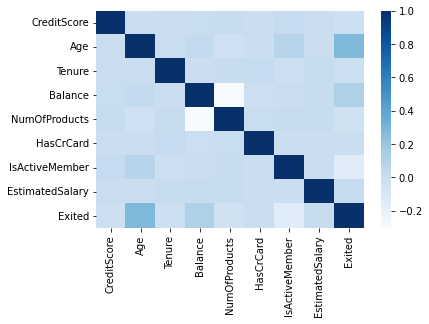

In [27]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns ,cmap="Blues")

In [28]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [33]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,0.169582,2,1,-0.464608,5,-1.215717,2,1,0,1.106432
9275,-2.304559,1,0,0.301026,1,-0.006312,1,1,1,-0.748664
2995,-1.191196,0,1,-0.943129,2,0.579935,1,1,0,1.485335
5316,0.035566,2,0,0.109617,5,0.473128,1,1,0,1.276528
356,2.056114,2,1,1.736588,8,0.810193,2,1,1,0.558378


# model

**baseline model**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
reg = LogisticRegression()
reg.fit(X_train , y_train)

LogisticRegression()

In [35]:
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [39]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



**we need to solve the imbalance problem**
1. **Data:**
* try under sampling 
* try over sampling 
* try both 

In [40]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 1632), (1, 1632)]


In [41]:
reg.fit(X_resampled,y_resampled)
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1595
           1       0.38      0.72      0.50       405

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



In [42]:
rf.fit(X_resampled,y_resampled)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1595
           1       0.47      0.78      0.59       405

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



In [43]:
model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1595
           1       0.45      0.75      0.56       405

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



In [52]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 6368), (1, 6368)]


In [53]:
smote_rf = RandomForestClassifier()
smote_rf.fit(X_resampled,y_resampled)
y_pred = smote_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1595
           1       0.59      0.67      0.62       405

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [46]:
model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1595
           1       0.63      0.59      0.61       405

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [47]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_pipe, y_pipe = pipeline.fit_resample(X_train, y_train)
Counter(y_pipe)

Counter({0: 3184, 1: 3184})

In [48]:
rf.fit(x_pipe,y_pipe)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1595
           1       0.53      0.73      0.62       405

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



In [49]:
model.fit(x_pipe,y_pipe)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1595
           1       0.50      0.70      0.59       405

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



**try to add class wieght to the classifier**

In [50]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train , y_train)
y_pred= rf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1745
           1       0.47      0.75      0.58       255

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.86      0.87      2000



**BalancedRandomForestClassifier**

In [51]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train) 
y_pred = brf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1325
           1       0.79      0.47      0.59       675

    accuracy                           0.78      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.78      0.78      0.76      2000



In [71]:
pkl_sc = open("..\\files\\scaler.pkl","wb")
pickle.dump(sc, pkl_sc)
pkl_sc.close()

In [59]:
pickle_out = open("..\\files\\classifier.pkl","wb")
pickle.dump(smote_rf, pickle_out)
pickle_out.close()

In [64]:
sample = np.array(X_test)
sample[0]

array([-0.55204276,  1.        ,  1.        , -0.36890377,  8.        ,
        0.8793029 ,  1.        ,  1.        ,  1.        ,  1.61085707])

In [90]:
pred = smote_rf.predict([sample[5]])
pred

array([1], dtype=int64)

In [91]:
pred[0]

1

In [72]:
import ctypes
print (ctypes.sizeof(ctypes.c_voidp))

8


In [74]:
import joblib
joblib.dump(smote_rf , "..\\files\\model.joblib")

['..\\files\\model.joblib']

In [75]:
ex = {
  "CreditScore": 5,
  "Geography": "Germany",
  "Gender": 'Male',
  "Age": 50,
  "Tenure": 200,
  "Balance": 500,
  "NumOfProducts": 600,
  "HasCrCard": 700,
  "IsActiveMember": 100,
  "EstimatedSalary": 99
}
country = {'France' : 0, 'Germany' : 1, 'Spain' : 2}
g = {'Male' : 0, 'Female' : 1}
ex['Geography']=country[ex['Geography']]
ex['Gender'] = g[ex['Gender']]

In [76]:
ex

{'CreditScore': 5,
 'Geography': 1,
 'Gender': 0,
 'Age': 50,
 'Tenure': 200,
 'Balance': 500,
 'NumOfProducts': 600,
 'HasCrCard': 700,
 'IsActiveMember': 100,
 'EstimatedSalary': 99}

In [85]:
cols = [ex['CreditScore'], ex['Balance'], ex['EstimatedSalary'], ex['Age'] ]
cols = np.array(cols)

In [86]:
scaled =sc.transform(cols.reshape(1, -1))

In [89]:
scaled[0][0]

-6.65492441912735